HW 2

Этот набор данных содержит информацию о подержанных автомобилях.

- Car_Name - Название автомобиля
- Year - год в котором купил машину предыдущий владелец
- Selling_Price - цена продажи машины сейчас
- Present_Price - предыдущая цена покупки
- Kms_Driven - сколько километров проехала машина
- Fuel_Type - тип используемого топлива
- Seller_Type - тип продавца
- Transmission - тип коробки передач
- Owner - количество владельцев автомобиля до текущего хозяина

Целевой переменной считать - Selling_Price.

1. После загрузки необходимо проанализировать существующие признаки.
2. Определите какие признаки являются числовыми, а какие категориальными (кодом!) Выведите список одних и других.
3. Используйте стратегию валидации Holdout. Постройте линейную регрессию на числовых признаках. Оцените качество работы с помощью метрик MSE и MAE.
4. Проанализируйте важность признаков без библиотеки yellowbrick.
5. Сравните результат вашего анализа с результатов yellowbrick.
6. Добавьте категориальные признаки при помощи метода sklearn.preprocessing.OneHotEncoder. [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) + [Пример использования](https://www.dmitrymakarov.ru/data-analysis/encoding-10/#10-klass-onehotencoder)
7. Переобучите модель. Также проанализируйте важность признаков, что изменилось? А как изменились метрики?
8. Добавьте регуляризацию (3 типа). Как меняется важность признаков? Как изменяются метрики?
9. Добавьте [Learning Curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html) для одной из моделей. [Визуализируйте результат!](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)

In [50]:
# Импорты

import pandas as pd

In [67]:
# Загрузка данных
sharing_url = "https://drive.google.com/file/d/1qeae-8oAfQnULTs838ROpupXLvMNwtiO/view?usp=sharing"
download_url = "https://drive.google.com/uc?id=" + sharing_url.split("/")[-2]

df = pd.read_csv(download_url)

In [51]:
df = pd.read_csv("./cars.csv")

In [52]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


### Задание 1: анализ признаков
Не совсем понятно, что имеется в виду под "необходимо проанализировать признаки", поэтому ниже просто посмотрим на то, что имеется в столбиках (кодом)

In [53]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [54]:
len(df["Car_Name"])

301

In [55]:
len(df["Car_Name"].unique())

98

In [56]:
df["Fuel_Type"].unique(), df["Seller_Type"].unique(), df["Transmission"].unique()

(array(['Petrol', 'Diesel', 'CNG'], dtype=object),
 array(['Dealer', 'Individual'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object))

In [57]:
df["Owner"].unique()

array([0, 1, 3])

In [58]:
df["Kms_Driven"].max(), df["Kms_Driven"].min(), df["Kms_Driven"].mean(), df["Kms_Driven"].median()

(np.int64(500000),
 np.int64(500),
 np.float64(36947.20598006644),
 np.float64(32000.0))

In [59]:
df["Present_Price"].max(), df["Present_Price"].min(), df["Present_Price"].mean(), df["Present_Price"].median()

(np.float64(92.6),
 np.float64(0.32),
 np.float64(7.628471760797343),
 np.float64(6.4))

In [60]:
df["Selling_Price"].max(), df["Selling_Price"].min(), df["Selling_Price"].mean(), df["Selling_Price"].median()

(np.float64(35.0),
 np.float64(0.1),
 np.float64(4.661295681063123),
 np.float64(3.6))

In [61]:
df["Year"].max(), df["Year"].min()

(np.int64(2018), np.int64(2003))

### Задание 2: списки по типам данных

In [62]:
import numpy as np

In [63]:
## Числовые
numerical = [*df.select_dtypes(include=np.number).columns]
numerical

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [64]:
## Категориальные
categorical = [*df.select_dtypes(exclude=np.number).columns]
categorical

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

### Задание 3: Линейная регрессия на числовых параметрах

Перед тренировкой нужно предобработать данные. Сразу подготовим данные для всех заданий.

#### Таргет

In [65]:
y = df["Selling_Price"].values

#### Только числовые

In [66]:
numerical_df = df.filter(numerical, axis=1).drop("Selling_Price", axis=1)
numerical_df

,Year,Present_Price,Kms_Driven,Owner
0,2014,5.59,27000,0
1,2013,9.54,43000,0
2,2017,9.85,6900,0
3,2011,4.15,5200,0
4,2014,6.87,42450,0
...,...,...,...,...
296,2016,11.60,33988,0
297,2015,5.90,60000,0
298,2009,11.00,87934,0
299,2017,12.50,9000,0


In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
X_numerical = pd.DataFrame(
    StandardScaler().fit_transform(
        numerical_df
    ),
    columns=numerical_df.columns,
)
X_numerical

,Year,Present_Price,Kms_Driven,Owner
0,0.128897,-0.236215,-0.256224,-0.174501
1,-0.217514,0.221505,0.155911,-0.174501
2,1.168129,0.257427,-0.773969,-0.174501
3,-0.910335,-0.403079,-0.817758,-0.174501
4,0.128897,-0.087890,0.141743,-0.174501
...,...,...,...,...
296,0.821718,0.460214,-0.076225,-0.174501
297,0.475308,-0.200292,0.593804,-0.174501
298,-1.603156,0.390687,1.313340,-0.174501
299,1.168129,0.564504,-0.719876,-0.174501


In [69]:
numerical_df.shape, X_numerical.shape, y.shape

((301, 4), (301, 4), (301,))

#### Кодирование категориальных

In [70]:
categorical_df = df.filter(categorical, axis=1)
categorical_df

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [73]:
one_hot_categorical = encoder.fit_transform(categorical_df)
one_hot_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(301, 105))

In [74]:
one_hot_df = pd.DataFrame(
    one_hot_categorical,
    columns=encoder.get_feature_names_out(categorical)
)

In [75]:
one_hot_df

,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [76]:
all_features_encoded_df = numerical_df.join(
    pd.DataFrame(
        one_hot_df
    )
)

all_features_encoded_df

,Year,Present_Price,Kms_Driven,Owner,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2013,9.54,43000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2017,9.85,6900,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,2011,4.15,5200,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,2014,6.87,42450,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
297,2015,5.90,60000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
298,2009,11.00,87934,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
299,2017,12.50,9000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [77]:
X_afe = pd.DataFrame(
    StandardScaler().fit_transform(
        all_features_encoded_df
    ),
    columns=all_features_encoded_df.columns,
)
X_afe

,Year,Present_Price,Kms_Driven,Owner,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0.128897,-0.236215,-0.256224,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
1,-0.217514,0.221505,0.155911,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148
2,1.168129,0.257427,-0.773969,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
3,-0.910335,-0.403079,-0.817758,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,8.616844,-0.100335,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
4,0.128897,-0.087890,0.141743,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.821718,0.460214,-0.076225,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148
297,0.475308,-0.200292,0.593804,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
298,-1.603156,0.390687,1.313340,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
299,1.168129,0.564504,-0.719876,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148


#### Бьем данные по стретегии Holdout

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
def holdout(X, y):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        shuffle=True,
        test_size=0.1,
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train,
        shuffle=True,
        test_size=0.11,  ##  Методом аццкого подгона
        random_state=42
    )

    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [80]:
X_num_train, X_num_valid, X_num_test, y_num_train, y_num_valid, y_num_test = holdout(X_numerical, y)

In [81]:
X_num_train.shape, X_num_valid.shape, X_num_test.shape

((240, 4), (30, 4), (31, 4))

In [82]:
y_num_train.shape, y_num_valid.shape, y_num_test.shape

((240,), (30,), (31,))

In [83]:
X_afe_train, X_afe_valid, X_afe_test, y_afe_train, y_afe_valid, y_afe_test = holdout(X_afe, y)

In [84]:
X_afe_train.shape, X_afe_valid.shape, X_afe_test.shape

((240, 109), (30, 109), (31, 109))

In [85]:
y_afe_train.shape, y_afe_valid.shape, y_afe_test.shape

((240,), (30,), (31,))

In [86]:
numeric_set_tupple = X_num_train, X_num_valid, X_num_test, y_num_train, y_num_valid, y_num_test

#### Данные готовы, можно начать эксперементировать

Работать будем по вот этому флоу.

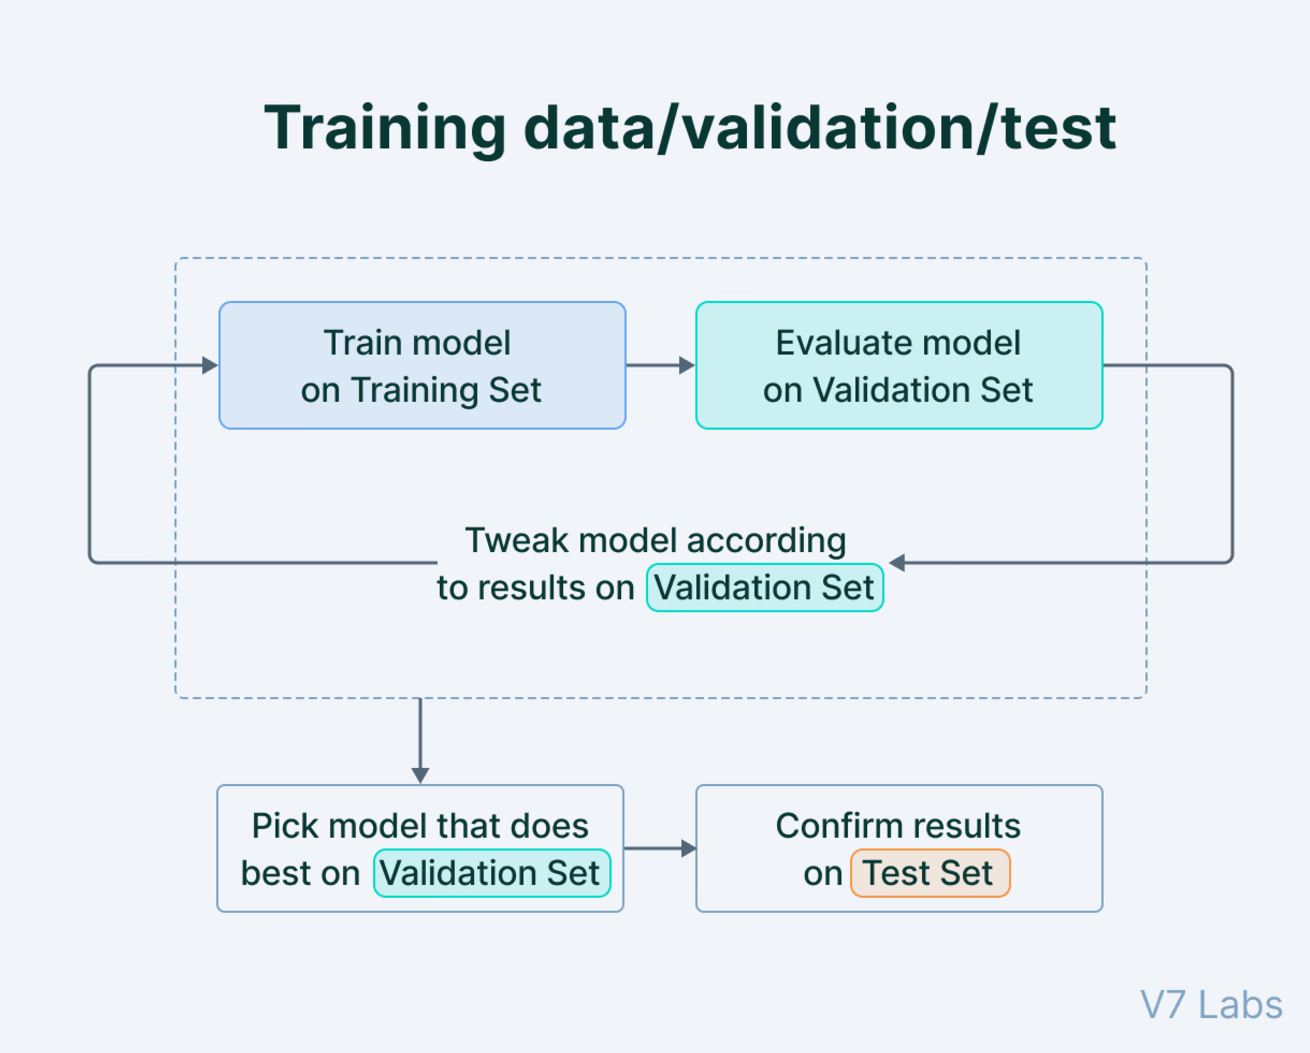

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [172]:
class Experiment:
    def __init__(self, model, params, train_test_valid_tuple) -> None:

        X_train, X_valid, X_test, y_train, y_valid, y_test = train_test_valid_tuple

        self.models = list()

        for param_d in params:

            try:
                reg = model(**param_d)
                reg.fit(X_train, y_train)

            except Exception as e:
                print(f"Failed to train model {model.__class__} with params")
                print(param_d)
                print(f"Exception: {e}")
                continue

            preds = reg.predict(X_valid)

            mse = mean_squared_error(y_valid, preds)
            mae = mean_absolute_error(y_valid, preds)

            self.models.append(
                {
                    "model": reg,
                    "cfg": param_d.copy(),
                    "valid_mse": mse,
                    "valid_mae": mae,
                }
            )

        self.best_mse_model = min(
            self.models,
            key=lambda d: d["valid_mse"]
        )

        preds = self.best_mse_model["model"].predict(X_test)

        self.best_mse_model["final_mse"] = mean_squared_error(y_test, preds)
        self.best_mse_model["final_mae"] = mean_absolute_error(y_test, preds)

        self.best_mae_model = min(
            self.models,
            key=lambda d: d["valid_mae"]
        )

        preds = self.best_mae_model["model"].predict(X_test)

        self.best_mae_model["final_mse"] = mean_squared_error(y_test, preds)
        self.best_mae_model["final_mae"] = mean_absolute_error(y_test, preds)

In [173]:
params = (
    {
        "fit_intercept": True,
        "positive": True,
    },
    {
        "fit_intercept": True,
        "positive": False,
    },
    {
        "fit_intercept": False,
        "positive": True,
    },
    {
        "fit_intercept": False,
        "positive": False,
    },
)

In [174]:
numeric_experiment = Experiment(
    LinearRegression,
    params,
    numeric_set_tupple
)

In [175]:
numeric_experiment.best_mse_model

{'model': LinearRegression(positive=True),
 'cfg': {'fit_intercept': True, 'positive': True},
 'valid_mse': 4.251731707468734,
 'valid_mae': 1.3340054593849484,
 'final_mse': 2.3963257728018177,
 'final_mae': 1.142152917079573}

In [176]:
numeric_experiment.best_mae_model

{'model': LinearRegression(positive=True),
 'cfg': {'fit_intercept': True, 'positive': True},
 'valid_mse': 4.251731707468734,
 'valid_mae': 1.3340054593849484,
 'final_mse': 2.3963257728018177,
 'final_mae': 1.142152917079573}

#### Побеждает модель в конфигурации True, True

Теперь можно прогнать ее на тесте и потыкать ее результаты

### Задание 4: важность признаков

In [177]:
print(numeric_experiment.best_mse_model["model"].coef_)

[1.38943263e+00 4.38280735e+00 3.73986873e-03 0.00000000e+00]


In [178]:
X_num_test.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [179]:
X_num_test.columns[
    numeric_experiment.best_mse_model["model"].coef_.argmax()
]

'Present_Price'

In [180]:
X_num_test.columns[
    numeric_experiment.best_mse_model["model"].coef_.argmin()
]

'Owner'

#### Кажется, модель нашла высокую корелляцию для Present_Price и Year. Чуть менее важным оказался километраж, а количество предыдущих владельцев совсем не озаботило.

### Задание 5: Yellowbrick

/home/smertlove/sandbox/hse/ml_hw/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


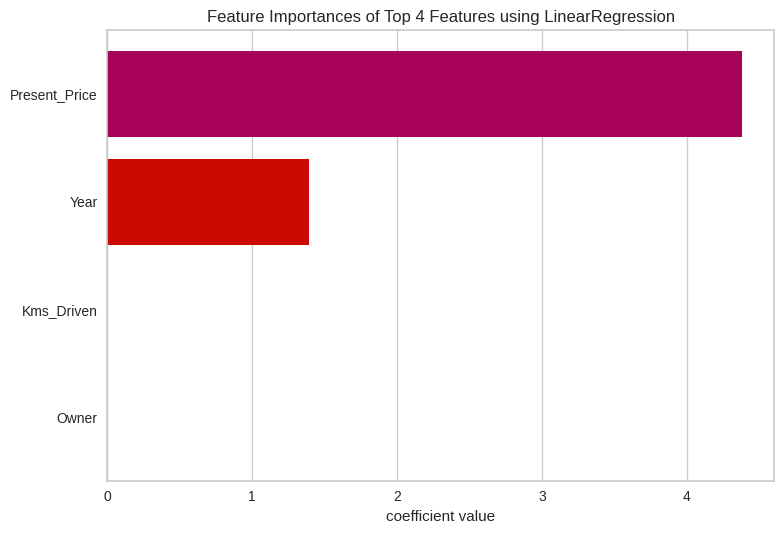

<Axes: title={'center': 'Feature Importances of Top 4 Features using LinearRegression'}, xlabel='coefficient value'>

In [181]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(numeric_experiment.best_mse_model["model"], topn=len(X_num_train.columns), relative=False)
viz.fit(X_num_train, y_num_train)
viz.show()

#### Не думал, что километраж оказался НАСТОЛЬКО менее значим

### Задание 6: one hot кодирование категориальный признаков
#### Выполнено на стадии подготовки данных:

In [182]:
X_afe_train

,Year,Present_Price,Kms_Driven,Owner,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
179,-1.256746,-0.762302,4.534844,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,-0.498962,0.509327,-1.356327,1.356327,-0.391480,0.391480
37,-3.681621,-0.619772,2.319619,-0.174501,17.320508,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,-0.498962,0.509327,-1.356327,1.356327,-0.391480,0.391480
41,0.128897,-0.422779,0.251371,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.391480,0.391480
253,0.128897,0.263221,0.284703,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.391480,0.391480
160,-0.910335,-0.773890,-0.333500,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,-0.498962,0.509327,-1.356327,1.356327,-0.391480,0.391480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,1.168129,-0.713633,-0.846093,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,-0.498962,0.509327,-1.356327,1.356327,-0.391480,0.391480
237,0.475308,0.691970,0.799871,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.391480,0.391480
287,0.475308,-0.014887,0.181669,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,-0.498962,0.509327,0.737285,-0.737285,2.554408,-2.554408
272,0.475308,0.274809,-0.240769,-0.174501,-0.057735,-0.081786,-0.057735,-0.057735,-0.057735,-0.057735,...,-0.057735,-0.116052,-0.100335,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.391480,0.391480


### Задание 7: Переобучение модели на сете с категориальными признаками

In [183]:
afe_set_tuple = X_afe_train, X_afe_valid, X_afe_test, y_afe_train, y_afe_valid, y_afe_test

In [184]:
afe_set_tuple[0].shape, afe_set_tuple[3].shape

((240, 109), (240,))

In [185]:
params = (
    {
        "fit_intercept": True,
        "positive": True,
    },
    {
        "fit_intercept": True,
        "positive": False,
    },
    {
        "fit_intercept": False,
        "positive": True,
    },
    {
        "fit_intercept": False,
        "positive": False,
    },
)

In [186]:
afe_experiment = Experiment(
    LinearRegression,
    params,
    afe_set_tuple
)

In [187]:
afe_experiment.best_mse_model

{'model': LinearRegression(),
 'cfg': {'fit_intercept': True, 'positive': False},
 'valid_mse': 3.741163612726322,
 'valid_mae': 1.1362494568644734,
 'final_mse': 2.3900469277770116,
 'final_mae': 0.8484664602560876}

In [188]:
afe_experiment.best_mae_model

{'model': LinearRegression(),
 'cfg': {'fit_intercept': True, 'positive': False},
 'valid_mse': 3.741163612726322,
 'valid_mae': 1.1362494568644734,
 'final_mse': 2.3900469277770116,
 'final_mae': 0.8484664602560876}

#### А тут лучшей оказалась моделька с дефолтными параметрами

#### MSE осталась такой же, значит модель совершает столько же больших ошибок. А вот MAE уменьшилась, то есть мелкие ошибки стали еще меньше.

/home/smertlove/sandbox/hse/ml_hw/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


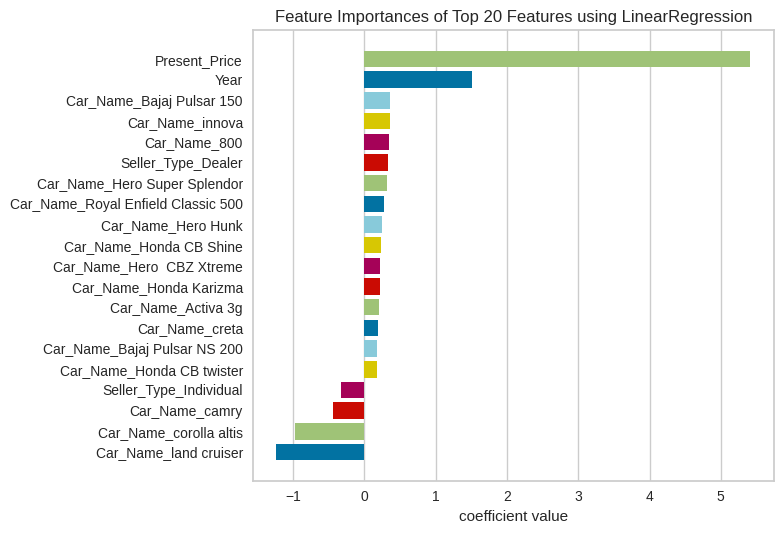

<Axes: title={'center': 'Feature Importances of Top 20 Features using LinearRegression'}, xlabel='coefficient value'>

In [189]:
viz = FeatureImportances(afe_experiment.best_mae_model["model"], topn=20, relative=False)
viz.fit(X_afe_train, y_afe_train)
viz.show()

#### Начианют ролять названия машин (как и в жизни, в принципе). При этом наиболее важные признаки все еще Present_Price и Year

### Задание 8: регуляризация

In [190]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [191]:
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
alphas = [alpha/10 for alpha in range(0, 11, 1)]
positives = (True, False)

params = list()


for solver in solvers:
    for alpha in alphas:
        for positive in positives:

            d_params = {
                "solver": solver,
                "alpha": alpha,
                "positive": positive
            }

            params.append(d_params)

In [192]:
ridge_experiment = Experiment(
    Ridge,
    params,
    afe_set_tuple
)

Failed to train model <class 'abc.ABCMeta'> with params
{'solver': 'svd', 'alpha': 0.0, 'positive': True}
Exception: solver='svd' does not support positive fitting. Please set the solver to 'auto' or 'lbfgs', or set `positive=False`
Failed to train model <class 'abc.ABCMeta'> with params
{'solver': 'svd', 'alpha': 0.1, 'positive': True}
Exception: solver='svd' does not support positive fitting. Please set the solver to 'auto' or 'lbfgs', or set `positive=False`
Failed to train model <class 'abc.ABCMeta'> with params
{'solver': 'svd', 'alpha': 0.2, 'positive': True}
Exception: solver='svd' does not support positive fitting. Please set the solver to 'auto' or 'lbfgs', or set `positive=False`
Failed to train model <class 'abc.ABCMeta'> with params
{'solver': 'svd', 'alpha': 0.3, 'positive': True}
Exception: solver='svd' does not support positive fitting. Please set the solver to 'auto' or 'lbfgs', or set `positive=False`
Failed to train model <class 'abc.ABCMeta'> with params
{'solver': '

In [194]:
len(params), len(ridge_experiment.models)

(176, 99)

In [195]:
ridge_experiment.best_mse_model

{'model': Ridge(solver='saga'),
 'cfg': {'solver': 'saga', 'alpha': 1.0, 'positive': False},
 'valid_mse': 3.1443580625934078,
 'valid_mae': 1.0249335026752229,
 'final_mse': 2.555563297457874,
 'final_mae': 0.9117271727636242}

In [196]:
ridge_experiment.best_mae_model

{'model': Ridge(solver='saga'),
 'cfg': {'solver': 'saga', 'alpha': 1.0, 'positive': False},
 'valid_mse': 3.1443580625934078,
 'valid_mae': 1.0249335026752229,
 'final_mse': 2.555563297457874,
 'final_mae': 0.9117271727636242}

/home/smertlove/sandbox/hse/ml_hw/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


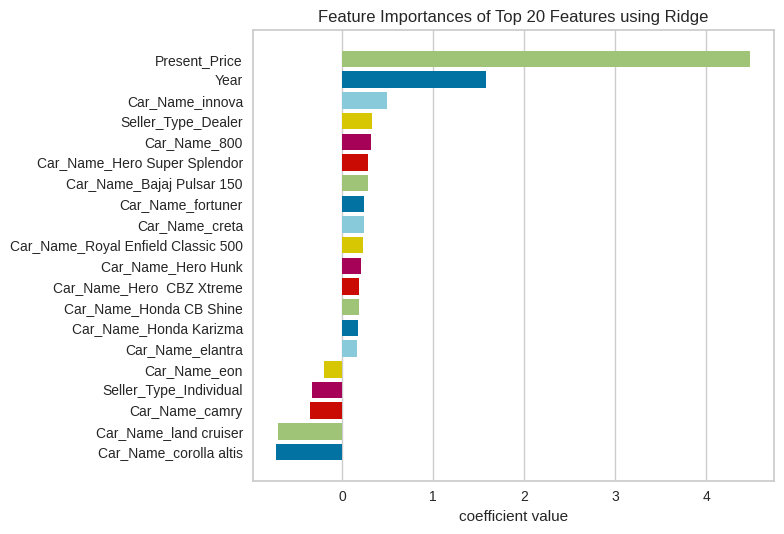

<Axes: title={'center': 'Feature Importances of Top 20 Features using Ridge'}, xlabel='coefficient value'>

In [199]:
viz = FeatureImportances(
    ridge_experiment.best_mae_model["model"],
    topn=20,
    relative=False
)
viz.fit(X_afe_train, y_afe_train)
viz.show()

#### Наблюдаются небольшие флуктуации по метрикам, важность признаков уменьшилась

In [203]:
alphas = [alpha/10 for alpha in range(1, 11, 1)]
selections = ['cyclic', 'random']
positives = (True, False)

params = list()

for alpha in alphas:
    for selection in selections:
        for positive in positives:
            params.append(
                {
                    "alpha": alpha,
                    "selection": selection,
                    "positive": positive,
                    "random_state": 42
                }
            )

In [204]:
len(params)

40

In [205]:
lasso_experiment = Experiment(
    Lasso,
    params,
    afe_set_tuple
)

In [206]:
lasso_experiment.best_mse_model

{'model': Lasso(alpha=0.1, positive=True, random_state=42, selection='random'),
 'cfg': {'alpha': 0.1,
  'selection': 'random',
  'positive': True,
  'random_state': 42},
 'valid_mse': 3.421019772782191,
 'valid_mae': 1.208501706814404,
 'final_mse': 2.3268954779345363,
 'final_mae': 0.9461268604699488}

In [207]:
lasso_experiment.best_mae_model

{'model': Lasso(alpha=0.1, random_state=42, selection='random'),
 'cfg': {'alpha': 0.1,
  'selection': 'random',
  'positive': False,
  'random_state': 42},
 'valid_mse': 3.890058199729152,
 'valid_mae': 1.2022093269947567,
 'final_mse': 2.7399185829953647,
 'final_mae': 0.8912490917865877}

/home/smertlove/sandbox/hse/ml_hw/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


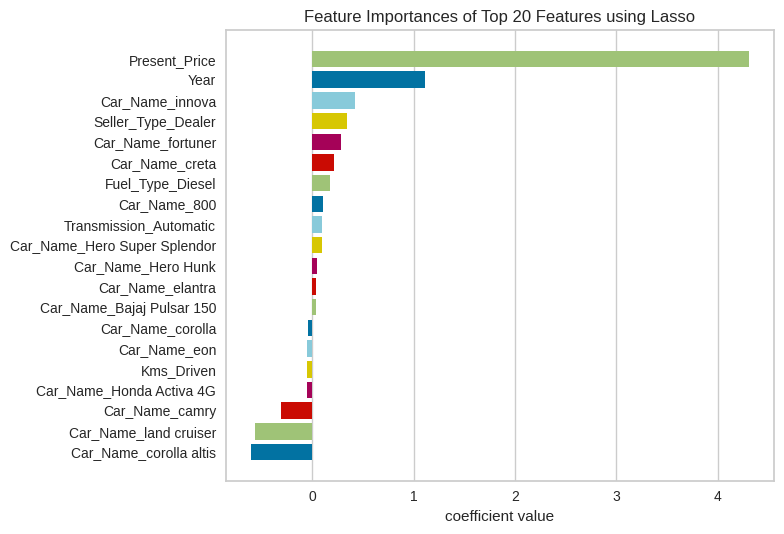

<Axes: title={'center': 'Feature Importances of Top 20 Features using Lasso'}, xlabel='coefficient value'>

In [209]:
viz = FeatureImportances(
    lasso_experiment.best_mae_model["model"],
    topn=20,
    relative=False
)
viz.fit(X_afe_train, y_afe_train)
viz.show()

#### Так же особенной разницы по метрикам не наблюдается, график важности фич выглядит более гладко.

In [210]:
params = list()
for alpha in alphas:
    for i in range(0, 11):
        l1_ratio = i/10
        for selection in selections:
            for positive in positives:
                params.append(
                    {
                        "l1_ratio": l1_ratio,
                        "alpha": alpha,
                        "selection": selection,
                        "positive": positive,
                        "random_state": 42
                    }
                )

In [211]:
elastic_net_experiment = Experiment(
    ElasticNet,
    params,
    afe_set_tuple
)

/home/smertlove/sandbox/hse/ml_hw/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.648e+02, tolerance: 6.527e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/smertlove/sandbox/hse/ml_hw/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.232e+02, tolerance: 6.527e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted u

In [214]:
elastic_net_experiment.best_mse_model

{'model': ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42, selection='random'),
 'cfg': {'l1_ratio': 0.1,
  'alpha': 0.1,
  'selection': 'random',
  'positive': False,
  'random_state': 42},
 'valid_mse': 2.9314246431873547,
 'valid_mae': 0.9521196937759077,
 'final_mse': 3.7072205472722914,
 'final_mae': 1.117547724538555}

In [216]:
elastic_net_experiment.best_mae_model

{'model': ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42, selection='random'),
 'cfg': {'l1_ratio': 0.1,
  'alpha': 0.1,
  'selection': 'random',
  'positive': False,
  'random_state': 42},
 'valid_mse': 2.9314246431873547,
 'valid_mae': 0.9521196937759077,
 'final_mse': 3.7072205472722914,
 'final_mae': 1.117547724538555}

/home/smertlove/sandbox/hse/ml_hw/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


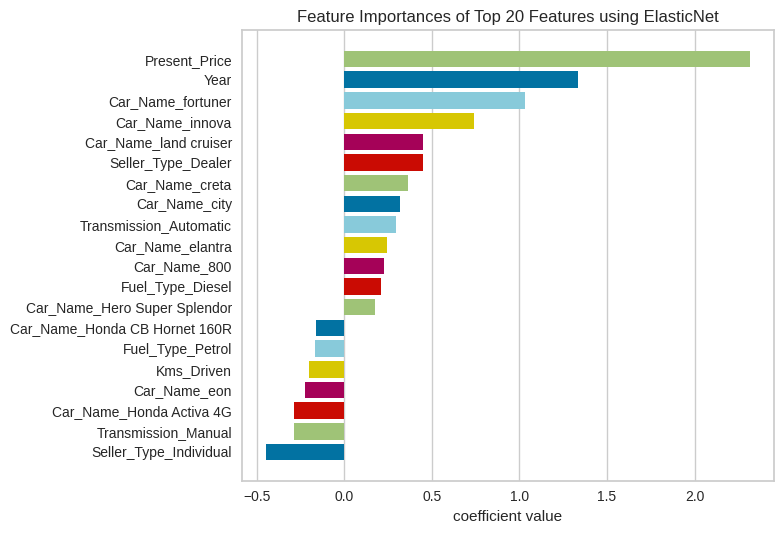

<Axes: title={'center': 'Feature Importances of Top 20 Features using ElasticNet'}, xlabel='coefficient value'>

In [217]:
viz = FeatureImportances(
    elastic_net_experiment.best_mae_model["model"],
    topn=20,
    relative=False
)
viz.fit(X_afe_train, y_afe_train)
viz.show()

#### Наблюдается сильное падение по тестовым mse и mae при заметном улучшении на валидационной выборке. Важность фич стала более равномерной

### Задание 9: Learning Curve

In [222]:
from sklearn.model_selection import learning_curve

In [223]:
train_size_abs, train_scores, test_scores = learning_curve(
    Ridge(solver='saga'),
    X_afe_train,
    y_afe_train,
    train_sizes=[0.3, 0.6, 0.9,]
)

In [224]:
for train_size, cv_train_scores, cv_test_scores in zip(
    train_size_abs, train_scores, test_scores
):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

57 samples were used to train the model
The average train accuracy is 0.98
The average test accuracy is 0.63
115 samples were used to train the model
The average train accuracy is 0.96
The average test accuracy is 0.82
172 samples were used to train the model
The average train accuracy is 0.95
The average test accuracy is 0.79


In [225]:
from sklearn.model_selection import LearningCurveDisplay

In [226]:
train_size_abs, train_scores, test_scores

(array([ 57, 115, 172]),
 array([[0.98219275, 0.98809295, 0.97267343, 0.97267332, 0.97267237],
        [0.96454135, 0.95567767, 0.95713812, 0.97217336, 0.97217382],
        [0.95109531, 0.9487915 , 0.94900747, 0.96826838, 0.95452206]]),
 array([[0.63036768, 0.49986718, 0.73637533, 0.61785315, 0.66478642],
        [0.79039869, 0.78575506, 0.84689973, 0.80066062, 0.88356749],
        [0.76830978, 0.84411021, 0.88460566, 0.75126994, 0.69284618]]))

In [227]:
display = LearningCurveDisplay(train_sizes=train_size_abs,
    train_scores=train_scores, test_scores=test_scores, score_name="Score")

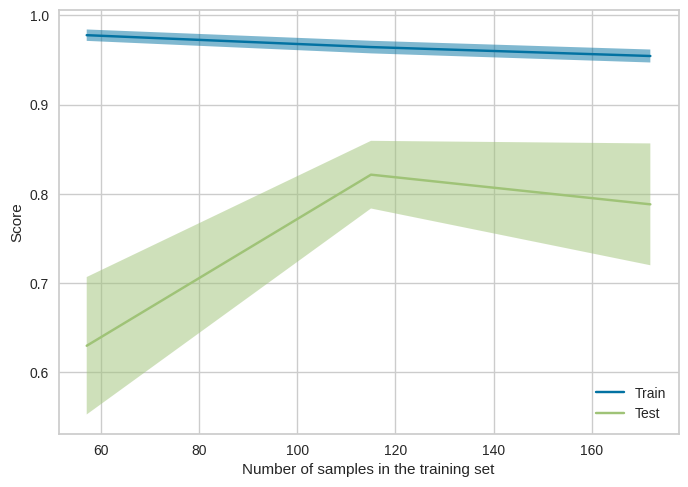

In [228]:
display.plot()